<center><h1> Predicting Length of Stay for Patients </h1></center>

In [3]:
# Importing libraries necessary for the modelling
import numpy as np
import pandas as pd

# Visualalization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split


#### Reading the Data

In [4]:
data = pd.read_csv('HealthCareDataSet_cleaned-3 PM.csv')
data.drop(['Id'],axis=1,inplace = True)       # dropping ID column as no analysis is to be done on this feature
data.shape                                    # number of rows and columns in the dataset

KeyError: "['Id'] not found in axis"

## 1. Data Cleaning

#### Missing values Analysis

In [ ]:
data.isnull().sum()

LengthOfStay                 0
ReadmissionCount          5570
Gender                       0
FacilityId                   0
KidneyAilments           10999
HeartAilments            10999
PyschologicalAilments        0
SubstanceAbuseHistory      392
BMI                          2
ABG                          0
Pulse                        2
SecondaryDiagnosis         239
dtype: int64

In [ ]:
data.SubstanceAbuseHistory.value_counts()

Unknown    9473
Yes        1517
Some          3
Slight        3
Few           3
Name: SubstanceAbuseHistory, dtype: int64

In [ ]:
data.KidneyAilments.value_counts()

Series([], Name: KidneyAilments, dtype: int64)

In [ ]:
data.HeartAilments.value_counts()

Series([], Name: HeartAilments, dtype: int64)

In [ ]:
data.ReadmissionCount.value_counts()

1.0    2701
2.0    1422
3.0     736
4.0     380
5.0     190
Name: ReadmissionCount, dtype: int64

In [ ]:
data.SecondaryDiagnosis.value_counts()

1.0     4196
2.0     2610
3.0     1568
4.0      946
5.0      545
6.0      363
7.0      221
8.0      133
0.0       81
9.0       59
10.0      38
Name: SecondaryDiagnosis, dtype: int64

In [ ]:
data.drop(['KidneyAilments','HeartAilments'],axis=1,inplace = True)            # Dropping these columns as all data points are null in this feature
data['SubstanceAbuseHistory'] = data['SubstanceAbuseHistory'].fillna('Unknown')     # replacing missing values with existing category - 'Unknown'
data['ReadmissionCount'] = data['ReadmissionCount'].fillna(1.0)             # filling up missing data in this column with the MODE
data['SecondaryDiagnosis'] = data['SecondaryDiagnosis'].fillna(1.0)             # filling up missing data in this column with the MODE
data.drop(['FacilityId'],axis=1,inplace=True)                          # This feature is the ID for every facility, does not provide any info

In [ ]:
data.isnull().sum()

LengthOfStay             0
ReadmissionCount         0
Gender                   0
PyschologicalAilments    0
SubstanceAbuseHistory    0
BMI                      2
ABG                      0
Pulse                    2
SecondaryDiagnosis       0
dtype: int64

In [ ]:
data.describe()

,LengthOfStay,ReadmissionCount,BMI,ABG,Pulse,SecondaryDiagnosis
count,10999.000000,10999.000000,10997.000000,10999.000000,10997.000000,10999.000000
mean,4.554232,1.435858,29.059925,142.644591,77.751023,2.415492
std,3.302963,0.891275,2.006137,30.329310,18.135555,1.772709
min,1.000000,1.000000,19.800000,-1.010000,10.000000,0.000000
25%,2.000000,1.000000,27.700000,123.000000,65.000000,1.000000
50%,4.000000,1.000000,29.000000,143.000000,78.000000,2.000000
75%,6.000000,1.000000,30.400000,163.000000,90.000000,3.000000
max,29.000000,5.000000,36.700000,253.000000,148.000000,10.000000


- Numerical Features like Lenght of Stay, BMI, ABG and Pulse have mean very close to the median. This means that the data has very less skewness and for missing data imputation we can use either mean or median.
- Readmission count and Secondary Diagnosis and actually categorical data that we will be changing the type of later on

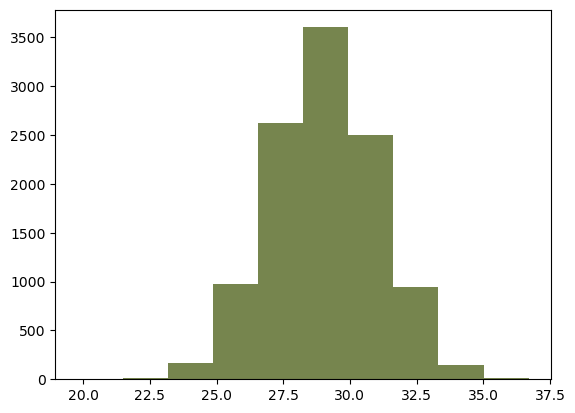

In [ ]:
plt.hist(data['BMI'],color='#76854E')
plt.show()

In [ ]:
# From the chart above we can see that the data is normal. With mean alomost equal to the median
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())               # filling up missing data points in this numerical feature with the median

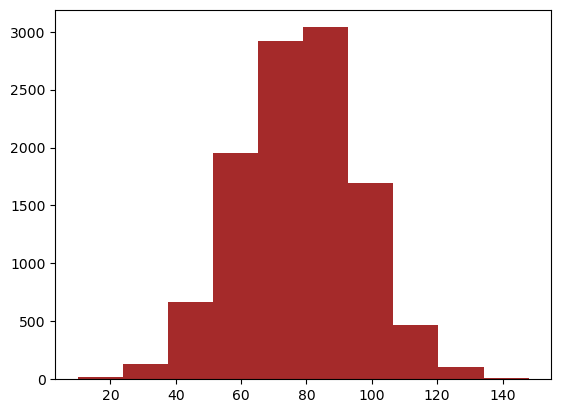

In [ ]:
plt.hist(data['Pulse'],color='brown')
plt.show()

In [ ]:
# From the chart above we can see that the data is normal. With mean alomost equal to the median
data['Pulse'] = data['Pulse'].fillna(data['Pulse'].mean())               # filling up missing data points in this numerical feature with the median

#### Handling Feature Data types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LengthOfStay           10999 non-null  int64  
 1   ReadmissionCount       10999 non-null  float64
 2   Gender                 10999 non-null  object 
 3   PyschologicalAilments  10999 non-null  bool   
 4   SubstanceAbuseHistory  10999 non-null  object 
 5   BMI                    10999 non-null  float64
 6   ABG                    10999 non-null  float64
 7   Pulse                  10999 non-null  float64
 8   SecondaryDiagnosis     10999 non-null  float64
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 698.3+ KB


In [ ]:
data['ReadmissionCount'] = data['ReadmissionCount'].astype('int').astype('object')
data['PyschologicalAilments'] = data['PyschologicalAilments'].astype('object')
data['SecondaryDiagnosis'] = data['SecondaryDiagnosis'].astype('int').astype('object')

#### Outlier Analysis

##### Using Scatter Plot

<Axes: >

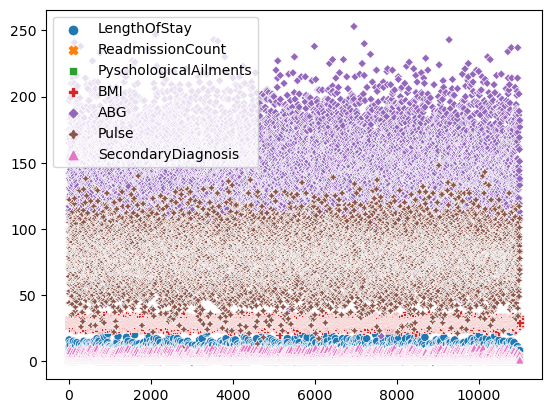

In [ ]:
sns.scatterplot(data=data) # Plotting all eligible data references

<Axes: xlabel='ReadmissionCount', ylabel='LengthOfStay'>

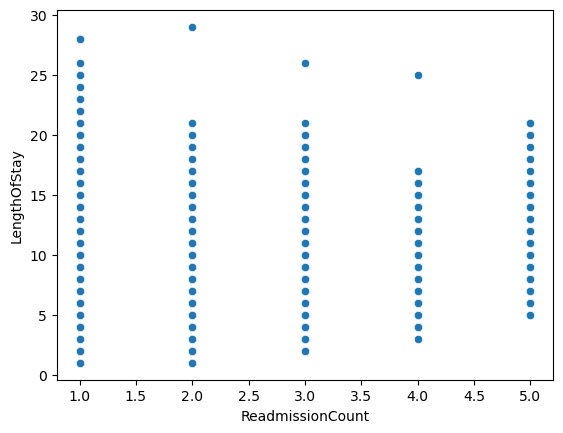

In [ ]:
sns.scatterplot(data=data, x='ReadmissionCount', y='LengthOfStay')          # Plotting LengthOfStay to identify Outliers

<Axes: xlabel='ReadmissionCount', ylabel='LengthOfStay'>

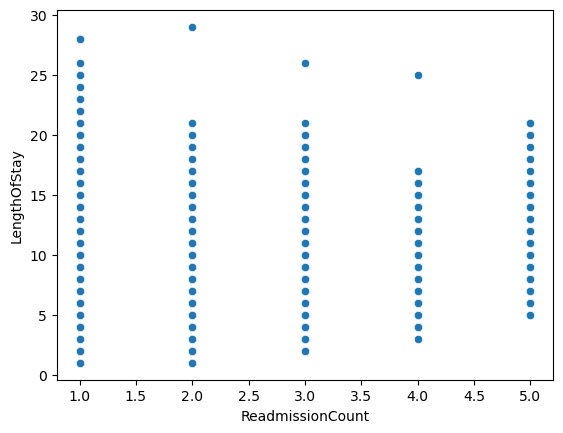

In [ ]:
sns.scatterplot(data=data, x='ReadmissionCount', y='LengthOfStay')              # Plotting ReadmissionCount to identify Outliers

<Axes: xlabel='ReadmissionCount', ylabel='LengthOfStay'>

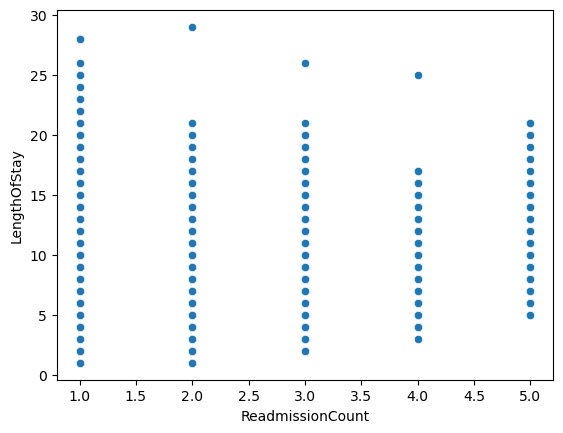

In [ ]:
sns.scatterplot(data=data, x='ReadmissionCount', y='LengthOfStay')             # Plotting PyschologicalAilments to identify Outliers

<Axes: xlabel='BMI', ylabel='LengthOfStay'>

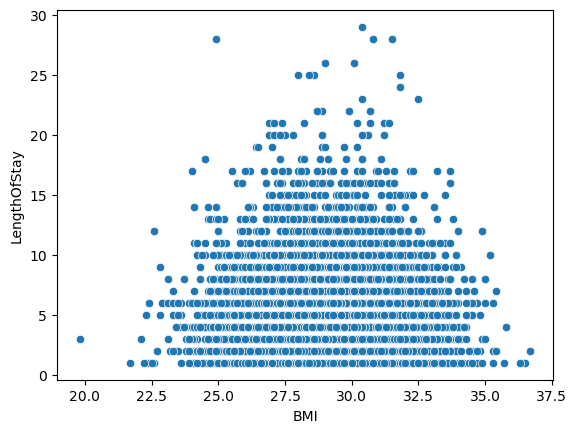

In [ ]:
sns.scatterplot(data=data, x='BMI', y='LengthOfStay')       # Plotting BMI to identify Outliers

<Axes: xlabel='ABG', ylabel='LengthOfStay'>

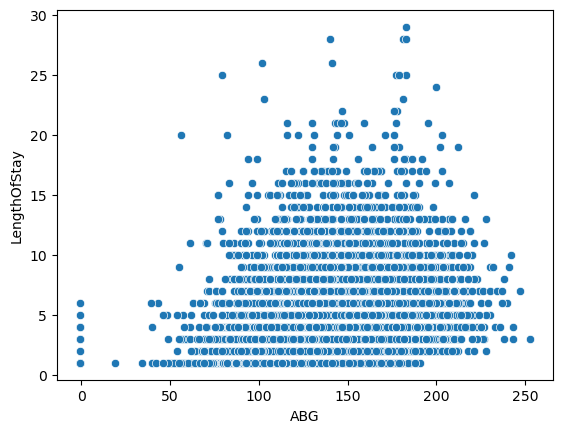

In [ ]:
sns.scatterplot(data=data, x='ABG', y='LengthOfStay')          # Plotting ABG to identify Outliers

<Axes: xlabel='Pulse', ylabel='LengthOfStay'>

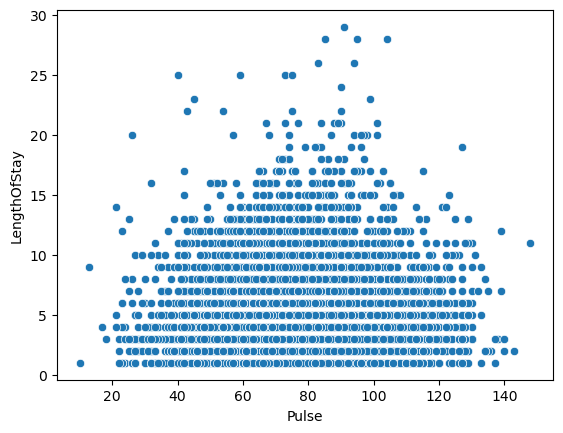

In [ ]:

sns.scatterplot(data=data, x='Pulse', y='LengthOfStay')          # Plotting Pluse to identify Outliers

<Axes: xlabel='SecondaryDiagnosis', ylabel='LengthOfStay'>

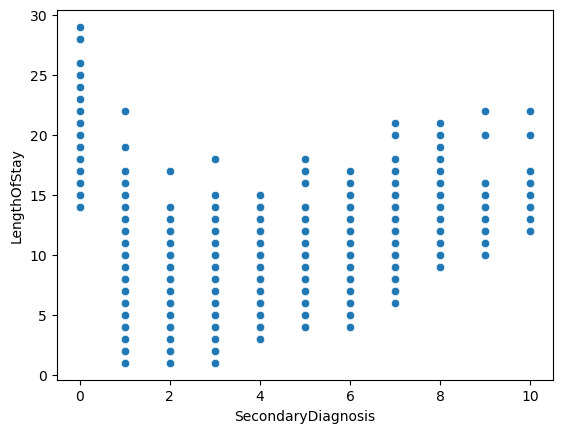

In [ ]:
sns.scatterplot(data=data, x='SecondaryDiagnosis', y='LengthOfStay')          # Plotting SecondaryDiagnosis to identify Outliers

#### Using Pairplot

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


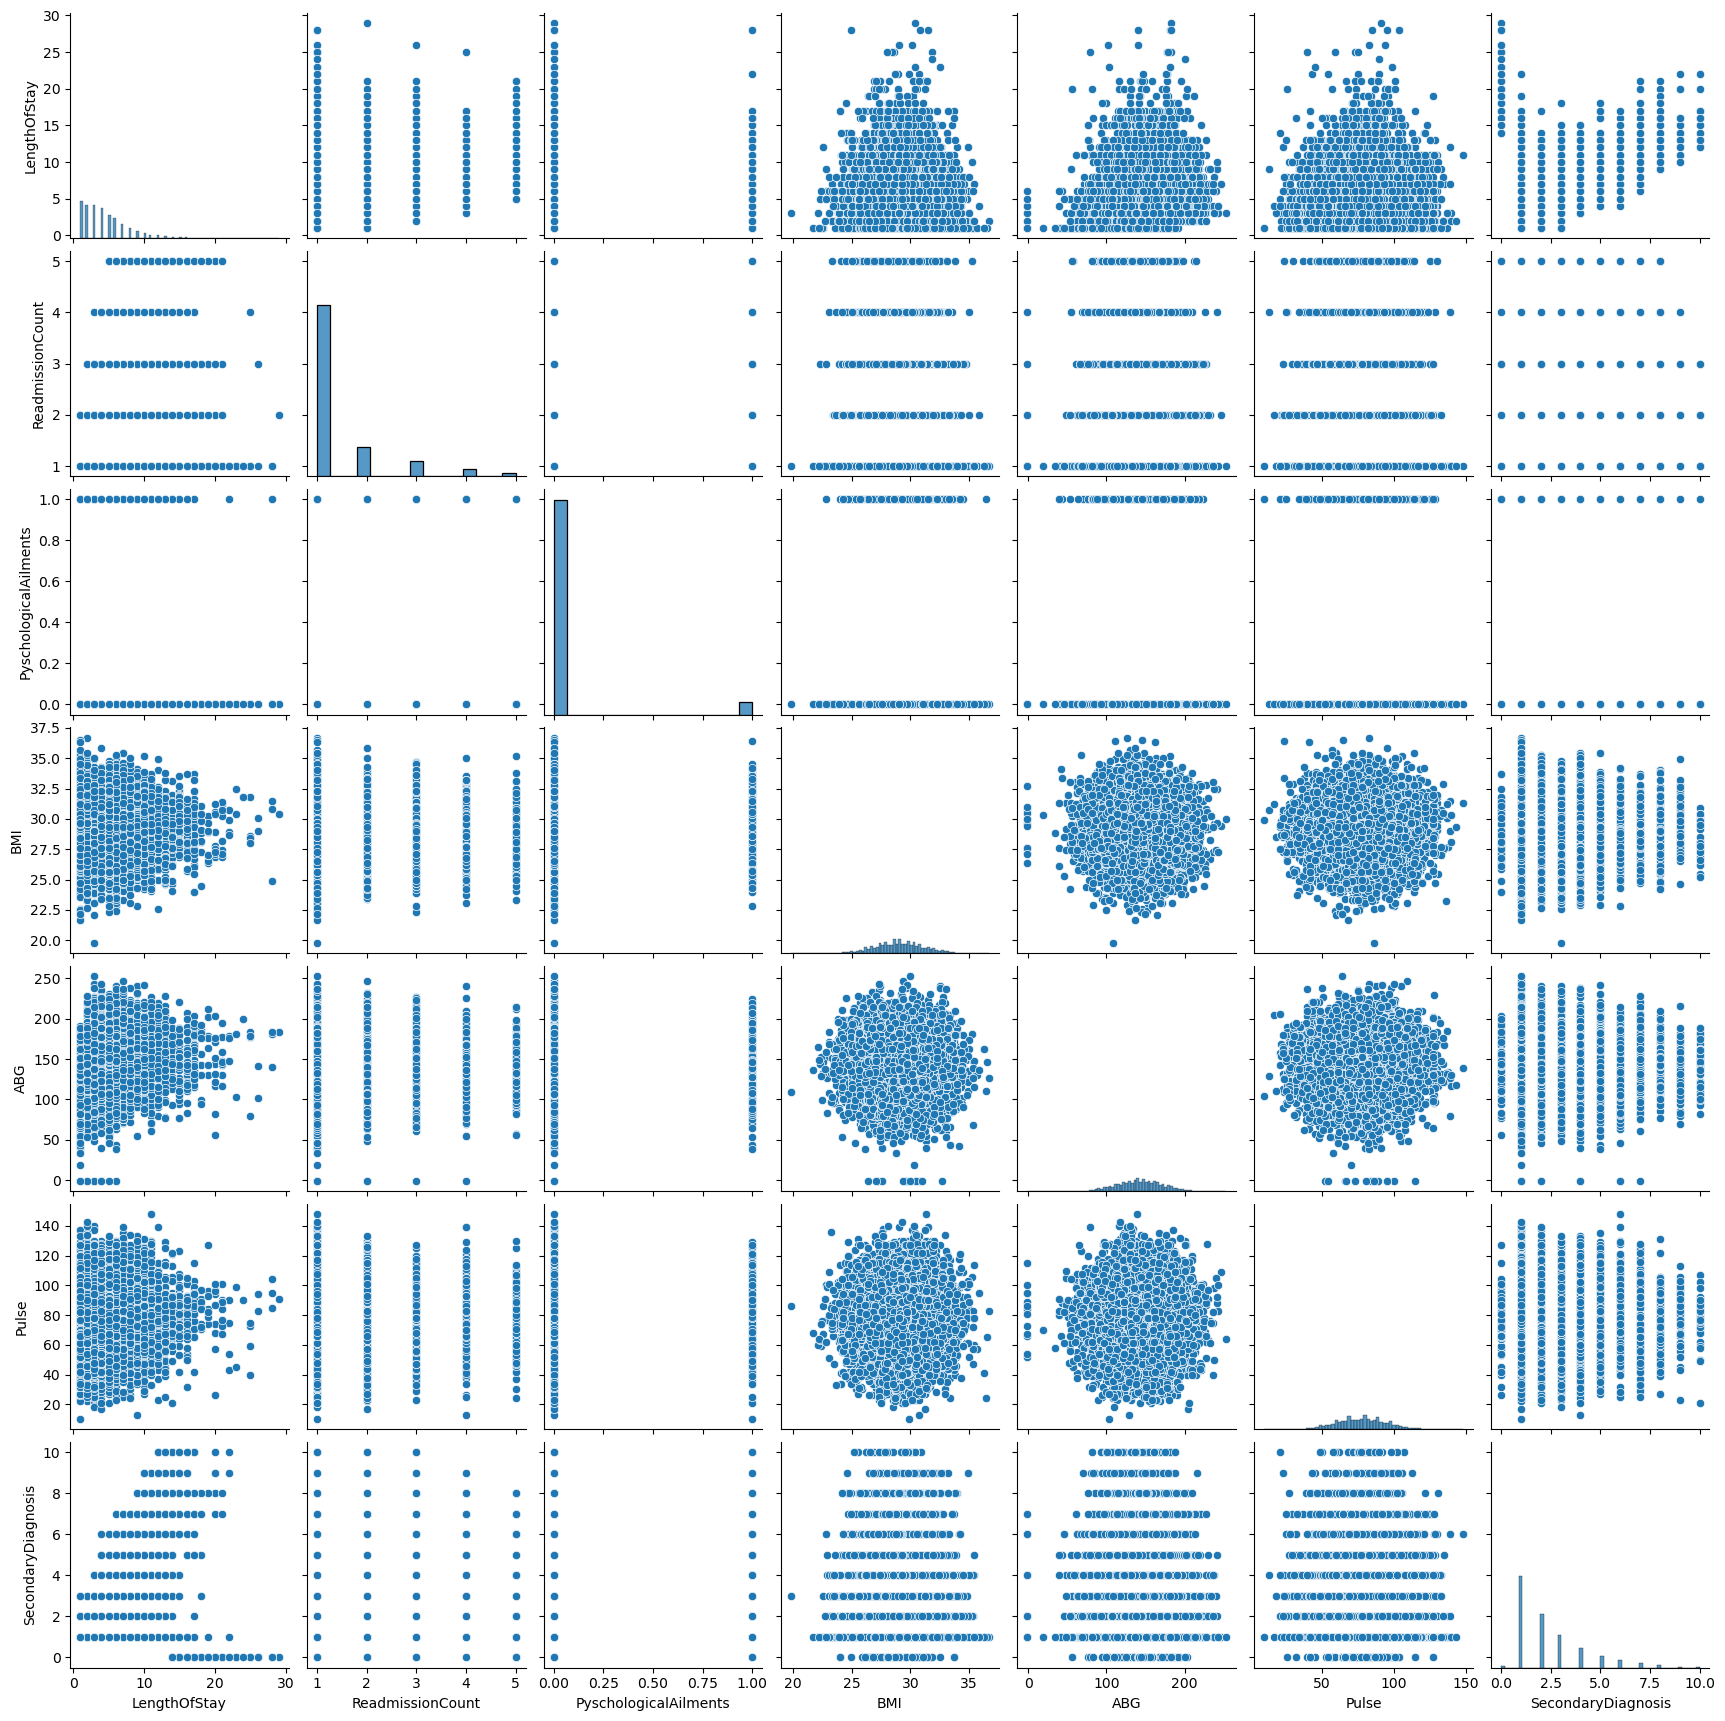

In [ ]:
sns.pairplot(data)

#### LM Plot to understand how specific feature(identified from above PairPlot) is affecting Length of Stay

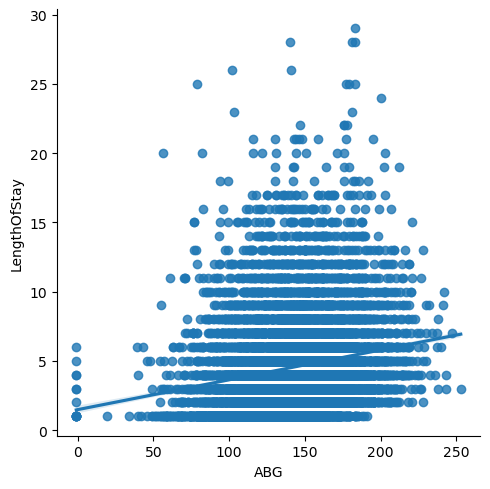

In [ ]:
sns.lmplot(data=data, x='ABG', y='LengthOfStay')

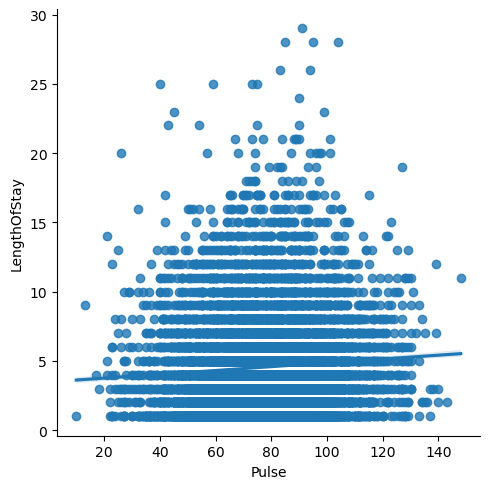

In [ ]:
sns.lmplot(data=data, x='Pulse', y='LengthOfStay')

#### Understanding correlation between features

C:\Users\user\AppData\Local\Temp\ipykernel_13336\3311185026.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationOfFeatures = data.corr()


<Axes: >

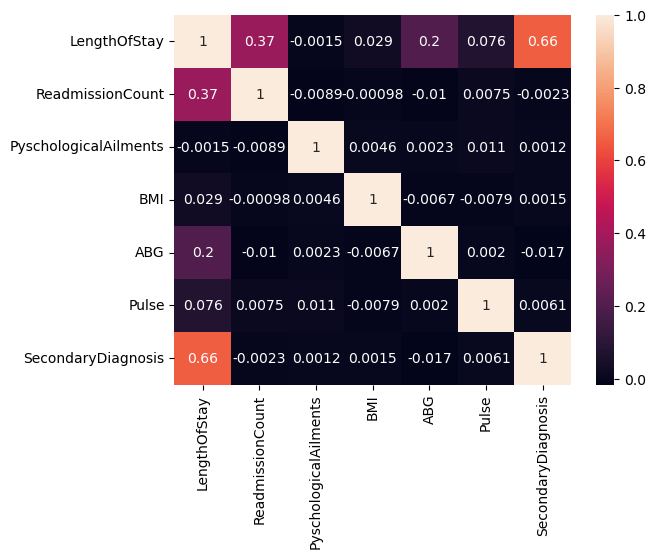

In [ ]:
correlationOfFeatures = data.corr()
sns.heatmap(data=correlationOfFeatures, annot=True)

## 2. Exploratory Data Analysis

## 2. Modelling

#### Using Liner Regression

In [5]:
# Setting Feature values to both X & y for model training 
X = data[['ReadmissionCount', 'Gender', 'PyschologicalAilments',
       'SubstanceAbuseHistory', 'BMI', 'ABG', 'Pulse', 'SecondaryDiagnosis']]
y = data['LengthOfStay']

# One-hot encoded values for categorical features
X = pd.get_dummies(
    X, columns=['Gender', 'SubstanceAbuseHistory'])

In [6]:
# Input data is split into Training and Testing data - based on random_state=1000 (Optimal value identified through Trail & Error)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1000)

In [7]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)     # Predicting using test data set 

In [8]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f"R2: {r2_score(y_test, y_pred)}")
print(f'Coefficients: {model.coef_}')

MSE: 3.1011579539398286
R2: 0.7018271603823426
Coefficients: [ 1.39370347 -0.01834203  0.04711454  0.02311955  0.01254797  1.22675179
 -0.38256735  0.38256735  0.00317412  0.08789885 -0.09107297]


#### Using OLS Method - NOT COMPLETE

In [130]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Assuming the 'X' and 'y' columns are present in the Excel file
X = data[['ReadmissionCount', 'Gender', 'PyschologicalAilments',
       'SubstanceAbuseHistory', 'BMI', 'ABG', 'Pulse', 'SecondaryDiagnosis']]
X = pd.get_dummies(
    X, columns=['Gender', 'SubstanceAbuseHistory'])
y = data['LengthOfStay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# Train the linear regression model
model = sm.OLS(y_train, X_train)
model.fit()

y_pred = model.predict(X_test)     # Predicting using test data set

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

# Print the coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

print(f"R-squared (R2): {r2_score(y_test, y_pred)}")


#### Notes:
- Filling up Readmission count with mode. Needs some feature engineering